# *Heart Disease Prediction Using the K-Nearest Neighbours Algorithm*

Group 31:
Vansh Sidhu (63883342),
Aaron Yang (63331953),
Markus Westenenk (48027031),
Gabriel-Henri Martin (18564575)


## Introduction

Heart disease, a range of conditions that affect the heart, is a leading cause of morbidity and mortality globally, accounting for an estimated 18 million deaths annually (Mattingly, 2021). Given its prevalence within the global population, it’s important that healthcare workers are equipped with adequate tools and knowledge to diagnose these conditions. 

A skilled healthcare professional, though able to properly diagnose an individual through consultation, can only evaluate one at a time. It is an equally slow and tedious process. In order to facilitate their lives and allow them to work on more urgent cases, we will develop an algorithm to accurately assess and diagnose patients who may be at risk. 

Cleveland's database on heart disease, provided by the UCI Machine Learning Repository, has a total of 14 subsets (variables), which may or may not indicate an increased chance of heart disease (Janosi et. al, 1989). These variables range from physical condition (age, cholesterol, blood pressure, and heart rate) to physical attributes (sex and age). For the sake of this project, we will try to predict the heart disease diagnosis of a person based on their age, cholesterol levels, and resting blood pressure using the k-nearest neighbor algorithm.

### Variable information:

**age**: age in years 

**sex**: sex (1 = male; 0 = female) 

**cp**: chest pain type 
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic
  
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
  
**chol**: serum cholestoral in mg/dl 

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

**restecg**: resting electrocardiographic results 
- Value 0: normal 
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  
**thalach**: maximum heart rate achieved
  
**exang**: exercise induced angina (1 = yes; 0 = no) 

**oldpeak** = ST depression induced by exercise relative to rest 

**slope**: the slope of the peak exercise ST segment 
- Value 1: upsloping 
- Value 2: flat 
- Value 3: downsloping
  
**ca**: number of major vessels (0-3) colored by flourosopy
  
**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect 

**num**: diagnosis of heart disease (angiographic disease status) 
- Value 0: < 50% diameter narrowing in any major vessel
- Value 1~4: > 50% diameter narrowing in any major vessel

## *Methods & Results* 

### Methods used to perform the analysis 
Firstly, we load the necessary packages for the analysis. Then, we read the heart disease data from a GitHub URL that we uploaded the dataset to. To turn our data into a tidy format, we rename the variables and ensure that the data types match those stated in the online source of the data set. Given that we're conducting classification, the response variable has to be of factor type. Thus, we create a new variable named "diagnosis," representing whether the individual has heart disease (TRUE) or not (FALSE). 


After cleaning the data, we split 75% of the data into training data and the rest into testing data, with roughly an equal proportion of TRUE and FALSE diagnosis in each set. Additinally, we made sure to set a seed so our analysis is reproducible, this is because the "initial_split" function uses randomness. Next, we perform a 5-fold cross-validation on around 33 different K values, ranging from K=1 to K=100, and pick the K value that provides the highest estimated accuracy on the validation set. Finally, we will build a new classifier using this best K value and evaluate our model on the testing set.

In [1]:
library(tidyverse)
library(tidymodels)
library(GGally) # For ggpairs, delete if need to.

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://raw.githubusercontent.com/r0nYang/Storage-for-dataset/main/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = FALSE)
colnames(heart_disease) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                            "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease_converted <- heart_disease |>
                        mutate(age = as.integer(age), sex = as_factor(sex), cp = as_factor(cp), 
                               trestbps = as.integer(trestbps), chol = as.integer(chol), 
                               fbs = as_factor(fbs), restecg = as_factor(restecg), thalach = as.integer(thalach), 
                               exang = as_factor(exang), oldpeak = as.integer(oldpeak), slope = as_factor(slope), 
                               ca = as.integer(ca), thal = as_factor(thal), num = as.integer(num))
head(heart_disease_converted)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0


In [3]:
heart_disease_mutated <- heart_disease_converted |>
                        mutate(diagnosis = case_when(num >= 1 ~ TRUE, num == 0 ~ FALSE)) |>
                        mutate(diagnosis = as_factor(diagnosis))
tail(heart_disease_mutated)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
57,0,4,140,241,0,0,123,1,0,2,0,7.0,1,TRUE
45,1,1,110,264,0,0,132,0,1,2,0,7.0,1,TRUE
68,1,4,144,193,1,0,141,0,3,2,2,7.0,2,TRUE
57,1,4,130,131,0,0,115,1,1,2,1,7.0,3,TRUE
57,0,2,130,236,0,2,174,0,0,2,1,3.0,1,TRUE
38,1,3,138,175,0,0,173,0,0,1,NA,3.0,0,FALSE


The variable num represents if a patient is diagnosed with heart disease (value 1~4) or is absence of it (value 0). As we're using the K-nn algorithm to predict a patient's diagnosis, the response variable needs to be a factor. Therefore, we created a new variable "diagnosis" which represents if a person is diagnosed with heart disease or not depending on the value of the variable "num".

### Data summary of the training data

In [4]:
set.seed(123)
heart_disease_split <- initial_split(heart_disease_mutated, prop = 0.75, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [5]:
nrow(filter(heart_disease_train, is.na(age) | is.na(trestbps) | is.na(chol) | is.na(diagnosis)))

[1] 0

The age, trestbps, diagnosis, and chol variables have no missing values in the training set.

In [6]:
group_by(heart_disease_train, diagnosis) |>
summarize(count= n(), percent = 100*count/nrow(heart_disease_train), avg_chol = mean(chol), median_chol = median(chol), avg_age = mean(age), avg_trestbps = mean(trestbps))

diagnosis,count,percent,avg_chol,median_chol,avg_age,avg_trestbps
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,123,54.18502,243.5691,235.0,52.94309,128.6504
TRUE,104,45.81498,250.6058,253.5,55.83654,135.9808


As shown in the table above, the proportion of individuals with and without heart disease is roughly equal. Within these two groups, it can be observed that those diagnosed with heart disease tend to have a higher average in cholestoral level, age, and resting blood pressure.

### Preliminary data visualization

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


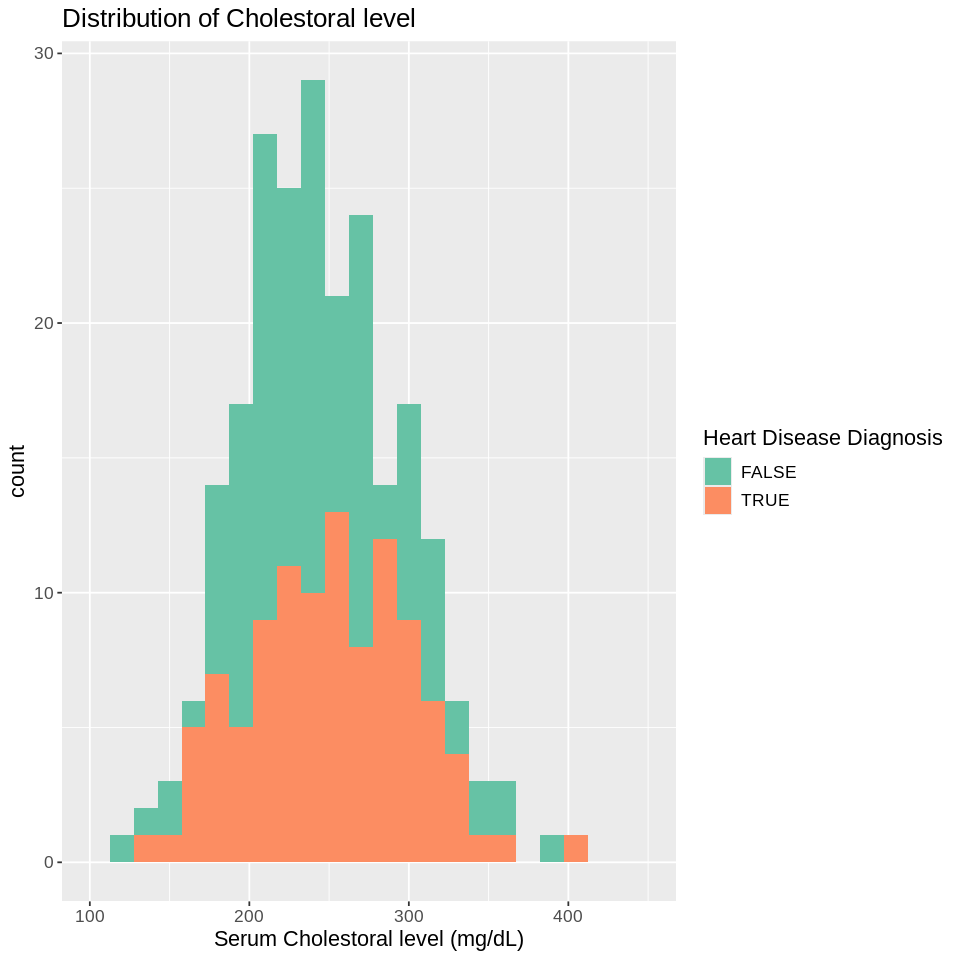

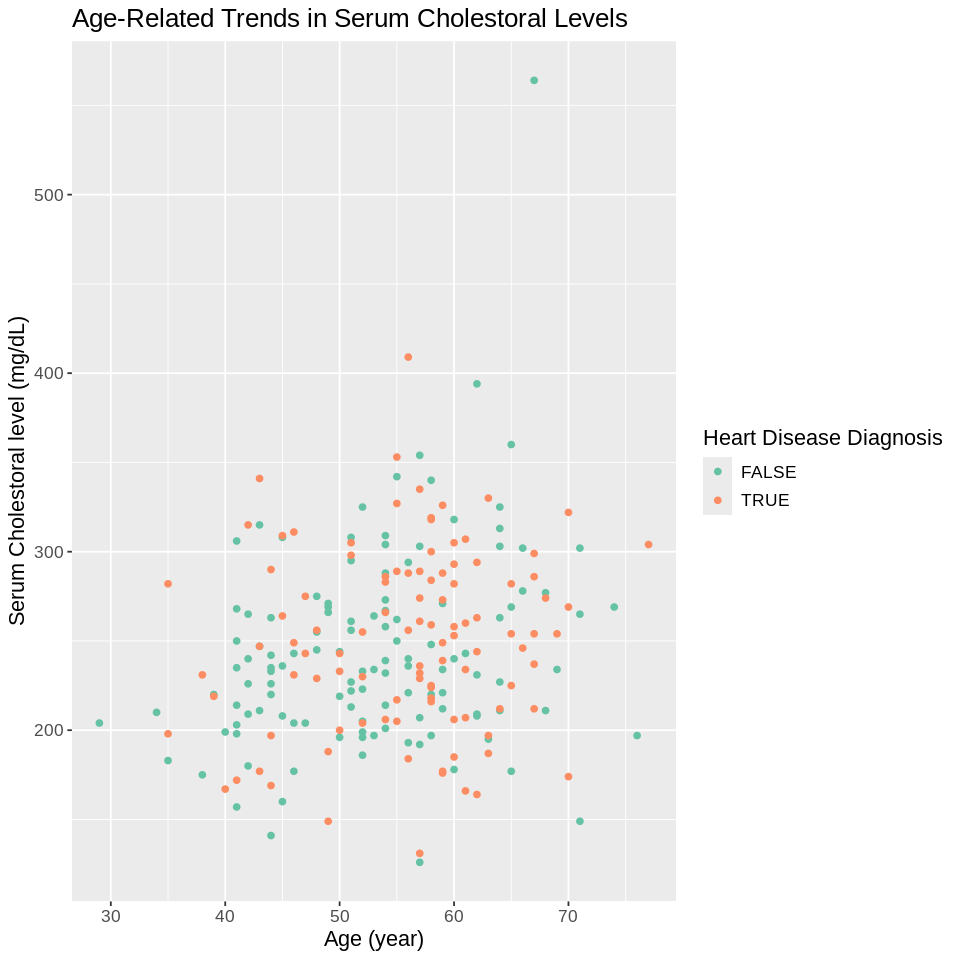

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


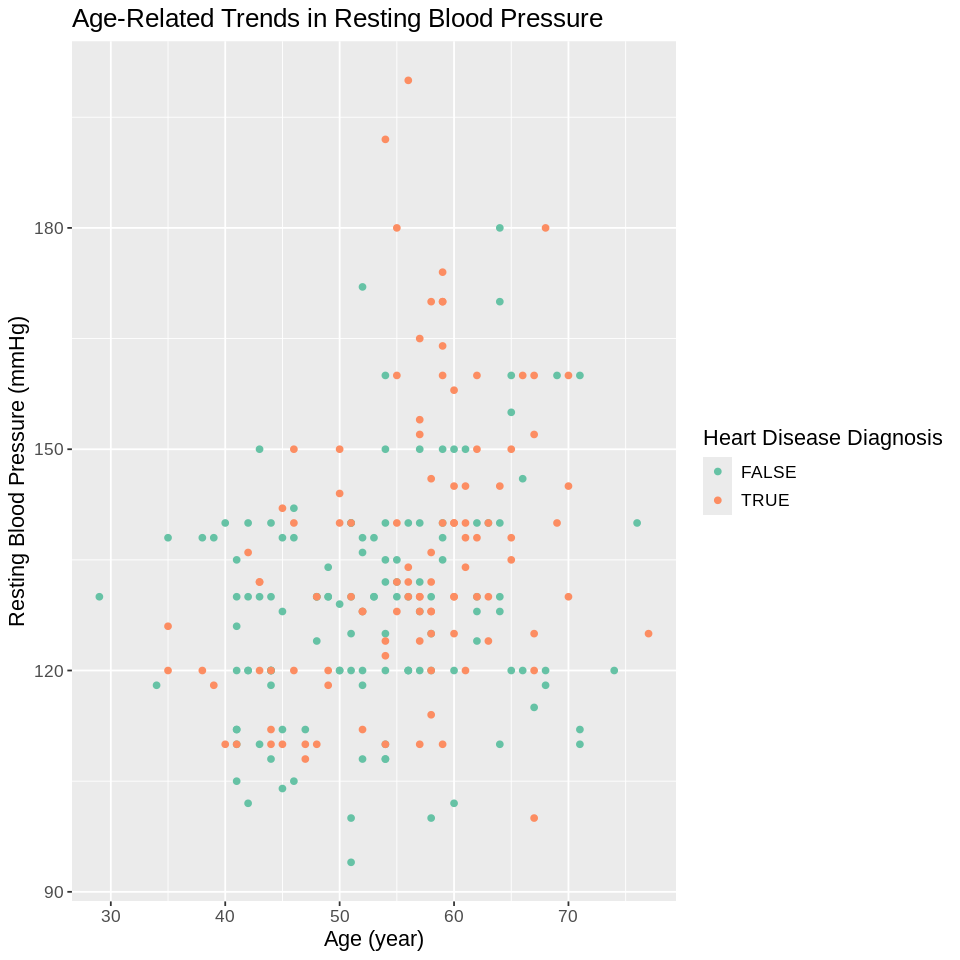

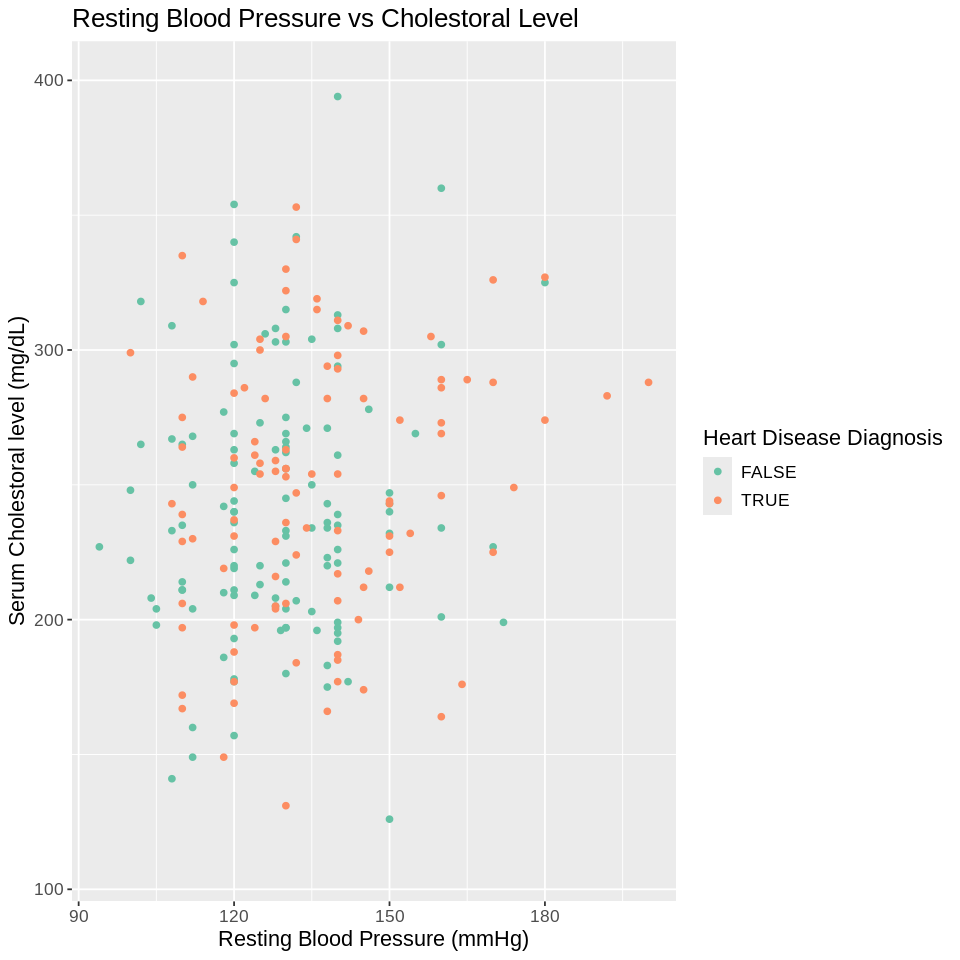

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

# heart_disease_pairs <- heart_disease_train |>
#                     select(chol,age,trestbps,diagnosis) |>
#                     ggpairs(columns = 1:3, aes(alpha=0.5,colour=diagnosis))
# heart_disease_pairs

chol_distribution <- heart_disease_train |>
                    ggplot(aes(x=chol, fill=diagnosis)) +
                    geom_histogram(position="stack", binwidth=15) +
                    labs(x="Serum Cholestoral level (mg/dL)", fill = "Heart Disease Diagnosis", title = "Distribution of Cholestoral level") +
                    xlim(100,450) +
                    scale_fill_brewer(palette = "Set2") +
                    theme(text= element_text(size=13))
chol_distribution

chol_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=chol,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Serum Cholestoral level (mg/dL)", colour = "Heart Disease Diagnosis", title = "Age-Related Trends in Serum Cholestoral Levels") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13)) 
chol_vs_age_plot

trestbps_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=trestbps,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Resting Blood Pressure (mmHg)", colour = "Heart Disease Diagnosis", title = "Age-Related Trends in Resting Blood Pressure") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13))
trestbps_vs_age_plot

trestbps_vs_chol_plot <- heart_disease_train |>
                ggplot(aes(x=trestbps, y=chol, colour=diagnosis)) +
                geom_point() +
                labs(x="Resting Blood Pressure (mmHg)", y="Serum Cholestoral level (mg/dL)", colour = "Heart Disease Diagnosis", title = "Resting Blood Pressure vs Cholestoral Level") +
                scale_colour_brewer(palette = "Set2") +
                ylim(110,400) +
                theme(text= element_text(size=13))
trestbps_vs_chol_plot

NEED TO HAVE EXPLANATION FOR VISUALIZATION ^^^

### Performing the data analysis

In [8]:
set.seed(123)
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

k_vals <- tibble(neighbors = seq(from=1, to=100, by=3))
                 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_disease_recipe <- recipe(diagnosis ~ trestbps + chol + age, data = heart_disease_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_fit <- workflow() |>
        add_recipe(heart_disease_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = heart_disease_vfold, grid = k_vals)

knn_result <- knn_fit |>
            collect_metrics() |>
            filter(.metric=="accuracy") |>
            arrange(desc(mean)) |>
            slice(1)
knn_result

# knn_result <- knn_fit |>
#             collect_metrics() |>
#             filter(.metric=="accuracy")

# knn_plot <- knn_result |>
#         ggplot(aes(x=neighbors,y=mean)) +
#         geom_point() +
#         geom_line()
# knn_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
76,accuracy,binary,0.6261265,5,0.02679542,Preprocessor1_Model26


While a 62.6% estimated accuracy isn't high, it does not mean our model is horrible. To further evaluate our classifier, we will build a new classifier using this best K value and check its accuracy, precision, and recall on the testing set.

In [11]:
# k_best <- knn_result |>
#         slice_max(mean,n=1) |>
#         pull(neighbors)

k_best <- knn_result |>
        pull(neighbors)
# k_best

knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
                set_engine("kknn") |>
                set_mode("classification")

knn_best_fit <- workflow() |>
            add_model(knn_spec_best) |>
            add_recipe(heart_disease_recipe) |>
            fit(data = heart_disease_train)

test_predictions <- predict(knn_best_fit, heart_disease_test) |>
                        bind_cols(heart_disease_test)
# head(test_predictions) # DELETE AFTER

predictions_recall <- test_predictions |>
                    recall(truth=diagnosis,estimate=.pred_class)
predictions_recall

predictions_accuracy <- test_predictions |>
                    metrics(truth=diagnosis,estimate=.pred_class) |>
                    filter(.metric == "accuracy")
predictions_accuracy

predictions_precision <- test_predictions |>
                    precision(truth=diagnosis,estimate=.pred_class)
predictions_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7317073


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5526316


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5660377


## *Discussion*

- hi

## *Expected Outcomes and Significance*

- Expectations: We anticipate a strong correlation between age, cholesterol levels, resting blood pressure, and heart disease diagnosis. Older individuals and those with elevated cholesterol or blood pressure are likely to have a higher risk of heart disease. We aim to identify specific patterns and combinations of these variables indicative of heart disease risk through this model. 

- Impact: If successful, this predictive model could help many patients by allowing an early identification of high-risk individuals. Healthcare professionals could then implement treatments, such as lifestyle modifications or medical treatments, to stop disease progression. Additionally, deeper insights into the underlying mechanisms could start the development of more effective techniques to prevent heart disease from starting or progressing.

- Future Questions: Further research may explore interactions of these factors with gender, lifestyle, or genetics in heart disease risk. Additionally, investigating the factors and variables into the predictive model could enhance its accuracy and give better results. 

## Citations

- Quinn Mattingly. (11 June 2021). Cardiovascular Diseases. WHO. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
- Manolio, T. A., Pearson, T. A., Wenger, N. K., Barrett-Connor, E., Payne, G. H., & Harlan, W. R. (1992). Cholesterol and heart disease in older persons and women review of an NHLBI workshop. Annals of Epidemiology, 2(1), 161-176. https://doi.org/10.1016/1047-2797(92)90051-Q
- Andras Janosi, W. S. (1989). Heart Disease [dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X 